## Import all the required libraries

### -- Data set used : * https://www.kaggle.com/datasets/shivamb/netflix-shows* 

In [193]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

# Basic level EDA

In [194]:
movies_original = pd.read_csv('netflix_titles_nov_2019.csv')
movies_original.head()

show_id                                title                    director  \
0  81193313                            Chocolate                         NaN   
1  81197050  Guatemala: Heart of the Mayan World  Luis Ara, Ignacio Jaunsolo   
2  81213894                      The Zoya Factor             Abhishek Sharma   
3  81082007                            Atlantics                   Mati Diop   
4  80213643                      Chip and Potato                         NaN   

                                                cast  \
0  Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...   
1                                  Christian Morales   
2  Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...   
3  Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...   
4  Abigail Oliver, Andrea Libman, Briana Buckmast...   

                    country         date_added  release_year rating  \
0               South Korea  November 30, 2019          2019  TV-14   
1                       NaN  November 30, 2019          2019   TV-G   
2                     India  November 30, 2019          2019  TV-14   
3  France, Senegal, Belgium  November 29, 2019          2019  TV-14   
4    Canada, United Kingdom                NaN          2019   TV-Y   

    duration                                          listed_in  \
0   1 Season  International TV Shows, Korean TV Shows, Roman...   
1     67 min                Documentaries, International Movies   
2    135 min             Comedies, Dramas, International Movies   
3    106 min   Dramas, Independent Movies, International Movies   
4  2 Seasons                                           Kids' TV   

                                         description     type  
0  Brought together by meaningful meals in the pa...  TV Show  
1  From Sierra de las Minas to Esquipulas, explor...    Movie  
2  A goofy copywriter unwittingly convinces the I...    Movie  
3  Arranged to marry a rich man, young Ada is cru...    Movie  
4  Lovable pug Chip starts kindergarten, makes ne...  TV Show

In [195]:
movies_original.shape

(5837, 12)

In [196]:
movies = movies_original[['show_id','title','director','country','date_added','release_year','rating','duration','type']]

In [197]:
movies.head()

show_id                                title                    director  \
0  81193313                            Chocolate                         NaN   
1  81197050  Guatemala: Heart of the Mayan World  Luis Ara, Ignacio Jaunsolo   
2  81213894                      The Zoya Factor             Abhishek Sharma   
3  81082007                            Atlantics                   Mati Diop   
4  80213643                      Chip and Potato                         NaN   

                    country         date_added  release_year rating  \
0               South Korea  November 30, 2019          2019  TV-14   
1                       NaN  November 30, 2019          2019   TV-G   
2                     India  November 30, 2019          2019  TV-14   
3  France, Senegal, Belgium  November 29, 2019          2019  TV-14   
4    Canada, United Kingdom                NaN          2019   TV-Y   

    duration     type  
0   1 Season  TV Show  
1     67 min    Movie  
2    135 min    Movie  
3    106 min    Movie  
4  2 Seasons  TV Show

In [198]:
movies.tail()

show_id                        title              director  \
5832  70141644  Mad Ron's Prevues from Hell            Jim Monaco   
5833  70127998                     Splatter             Joe Dante   
5834  70084180      Just Another Love Story          Ole Bornedal   
5835  70157452              Dinner for Five                   NaN   
5836  70053412         To and From New York  Sorin Dan Mihalcescu   

            country         date_added  release_year rating  duration     type  
5832  United States   November 1, 2010          1987     NR    84 min    Movie  
5833  United States  November 18, 2009          2009  TV-14    29 min    Movie  
5834        Denmark        May 5, 2009          2007     NR   104 min    Movie  
5835  United States   February 4, 2008          2007  TV-MA  1 Season  TV Show  
5836  United States    January 1, 2008          2006     NR    81 min    Movie

In [199]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5837 entries, 0 to 5836
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       5837 non-null   int64 
 1   title         5837 non-null   object
 2   director      3936 non-null   object
 3   country       5410 non-null   object
 4   date_added    5195 non-null   object
 5   release_year  5837 non-null   int64 
 6   rating        5827 non-null   object
 7   duration      5837 non-null   object
 8   type          5837 non-null   object
dtypes: int64(2), object(7)
memory usage: 410.5+ KB


In [200]:
# director column contains most of the null values, although this column is not much of a use in our analysis
movies.isna().sum()

show_id            0
title              0
director        1901
country          427
date_added       642
release_year       0
rating            10
duration           0
type               0
dtype: int64

In [202]:
# droping rows with 2 or more null values 
movies.dropna(axis=0,thresh=8,inplace=True)

In [203]:
movies['type'].unique()

array(['TV Show', 'Movie'], dtype=object)

In [204]:
movies['rating'].unique()

array(['TV-14', 'TV-G', 'TV-MA', 'TV-PG', 'R', 'TV-Y7', 'TV-Y', 'PG', 'G',
       'PG-13', 'TV-Y7-FV', 'NR', 'UR', 'NC-17', nan], dtype=object)

In [205]:
movies.dtypes

show_id          int64
title           object
director        object
country         object
date_added      object
release_year     int64
rating          object
duration        object
type            object
dtype: object

In [206]:
# Change data type of date_added to datetime
movies.date_added = pd.to_datetime(movies.date_added,format='%B %d, %Y')

In [207]:
movies.dtypes

show_id                  int64
title                   object
director                object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
type                    object
dtype: object

In [208]:
movies.head()

show_id                                title                    director  \
0  81193313                            Chocolate                         NaN   
1  81197050  Guatemala: Heart of the Mayan World  Luis Ara, Ignacio Jaunsolo   
2  81213894                      The Zoya Factor             Abhishek Sharma   
3  81082007                            Atlantics                   Mati Diop   
5  81172754                         Crazy people                Moses Inwang   

                    country date_added  release_year rating  duration     type  
0               South Korea 2019-11-30          2019  TV-14  1 Season  TV Show  
1                       NaN 2019-11-30          2019   TV-G    67 min    Movie  
2                     India 2019-11-30          2019  TV-14   135 min    Movie  
3  France, Senegal, Belgium 2019-11-29          2019  TV-14   106 min    Movie  
5                   Nigeria 2019-11-29          2018  TV-14   107 min    Movie

### Matplotlib version of histograms

<AxesSubplot:>

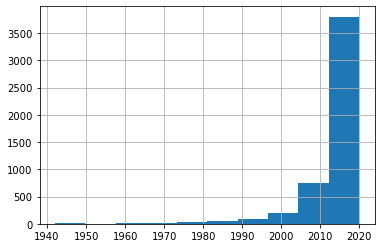

In [211]:
# Now we will make a histogram for the year columns
movies['release_year'].hist()

In [212]:
# Make a seperate columns for month in which a movie was added to netflix
movies['month_added'] = movies.date_added.dt.month

In [213]:
movies.date_added.min()

Timestamp('2008-01-01 00:00:00')

In [214]:
movies.date_added.max()

Timestamp('2019-11-30 00:00:00')

<AxesSubplot:>

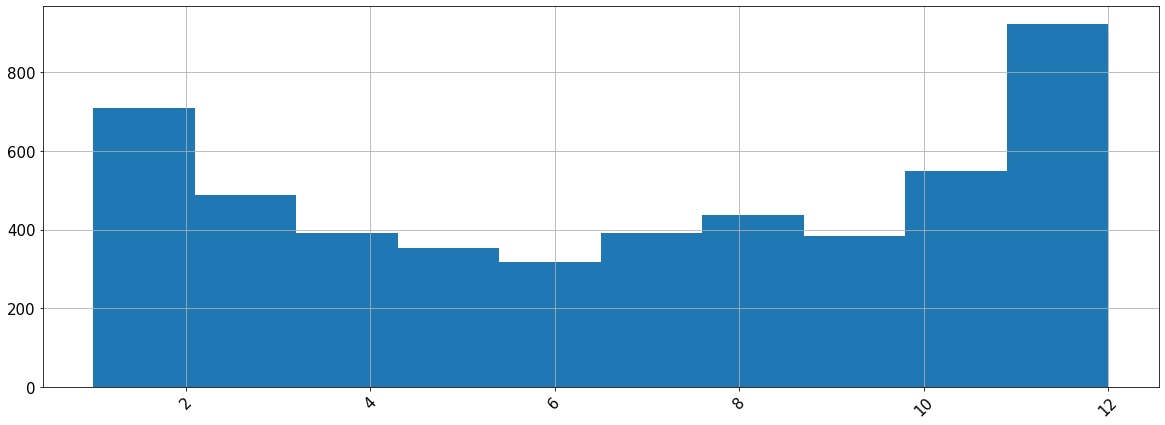

In [215]:
plt.figure(figsize=(20,7))
plt.xticks(fontsize=15,rotation=45)
plt.yticks(fontsize=15)
movies.month_added.hist()

## Plotly version of histograms

In [216]:
fig = px.histogram(movies,x='month_added')
fig.show()

In [217]:
px.histogram(movies,x='release_year')

In [218]:
movies.head()

show_id                                title                    director  \
0  81193313                            Chocolate                         NaN   
1  81197050  Guatemala: Heart of the Mayan World  Luis Ara, Ignacio Jaunsolo   
2  81213894                      The Zoya Factor             Abhishek Sharma   
3  81082007                            Atlantics                   Mati Diop   
5  81172754                         Crazy people                Moses Inwang   

                    country date_added  release_year rating  duration  \
0               South Korea 2019-11-30          2019  TV-14  1 Season   
1                       NaN 2019-11-30          2019   TV-G    67 min   
2                     India 2019-11-30          2019  TV-14   135 min   
3  France, Senegal, Belgium 2019-11-29          2019  TV-14   106 min   
5                   Nigeria 2019-11-29          2018  TV-14   107 min   

      type  month_added  
0  TV Show         11.0  
1    Movie         11.0  
2    Movie         11.0  
3    Movie         11.0  
5    Movie         11.0

In [219]:
movies.type.value_counts()

Movie      3902
TV Show    1070
Name: type, dtype: int64

In [220]:
movies.country.unique()

array(['South Korea', nan, 'India', 'France, Senegal, Belgium', 'Nigeria',
       'France', 'South Africa', 'United States', 'Japan', 'Brazil',
       'Germany, Canada, United States', 'Canada, Norway', 'Mexico',
       'China', 'United States, United Arab Emirates',
       'United States, Japan', 'Singapore, United States',
       'United Kingdom, Germany, Canada, United States',
       'Australia, France', 'Germany', 'Germany, United Kingdom',
       'Italy, United States',
       'United States, New Zealand, United Kingdom',
       'United Kingdom, Germany, United States', 'United States, Germany',
       'Argentina', 'Taiwan', 'Finland, Germany, Belgium',
       'United Kingdom, France', 'United States, Spain, Chile, Peru',
       'Colombia', 'Spain', 'United States, Ireland',
       'India, United States', 'Thailand',
       'Argentina, United States, Mexico', 'United Kingdom',
       'United States, United Kingdom, Canada', 'China, Hong Kong',
       'Canada, United States', 'Can

In [221]:
movies['day_added'] = movies.date_added.dt.day

In [222]:
movies.head()

show_id                                title                    director  \
0  81193313                            Chocolate                         NaN   
1  81197050  Guatemala: Heart of the Mayan World  Luis Ara, Ignacio Jaunsolo   
2  81213894                      The Zoya Factor             Abhishek Sharma   
3  81082007                            Atlantics                   Mati Diop   
5  81172754                         Crazy people                Moses Inwang   

                    country date_added  release_year rating  duration  \
0               South Korea 2019-11-30          2019  TV-14  1 Season   
1                       NaN 2019-11-30          2019   TV-G    67 min   
2                     India 2019-11-30          2019  TV-14   135 min   
3  France, Senegal, Belgium 2019-11-29          2019  TV-14   106 min   
5                   Nigeria 2019-11-29          2018  TV-14   107 min   

      type  month_added  day_added  
0  TV Show         11.0       30.0  
1    Movie         11.0       30.0  
2    Movie         11.0       30.0  
3    Movie         11.0       29.0  
5    Movie         11.0       29.0

In [223]:
px.histogram(data_frame=movies,x='day_added')

## Some key info from the above analysis
### -- *Most of the movies on Netflix are added on October and November month*
### -- *Majority of the movies/tv shows were released during year 2014 and 2018*
### -- *Netflix addd most of it's movies/shows in 1st of every month*
### -- *Most of the movies/shows features only one Actor or Actress that is with one cast only*

In [224]:
px.histogram(movies,x='month_added',color='type')

In [225]:
movies['country'].str.split(',',expand=True).head(10)

0         1         2     3     4     5     6     7     8   \
0     South Korea      None      None  None  None  None  None  None  None   
1             NaN       NaN       NaN   NaN   NaN   NaN   NaN   NaN   NaN   
2           India      None      None  None  None  None  None  None  None   
3          France   Senegal   Belgium  None  None  None  None  None  None   
5         Nigeria      None      None  None  None  None  None  None  None   
6          France      None      None  None  None  None  None  None  None   
7    South Africa      None      None  None  None  None  None  None  None   
9             NaN       NaN       NaN   NaN   NaN   NaN   NaN   NaN   NaN   
10        Nigeria      None      None  None  None  None  None  None  None   
11  United States      None      None  None  None  None  None  None  None   

      9     10    11  
0   None  None  None  
1    NaN   NaN   NaN  
2   None  None  None  
3   None  None  None  
5   None  None  None  
6   None  None  None  
7   None  None  None  
9    NaN   NaN   NaN  
10  None  None  None  
11  None  None  None

In [226]:
country_count = movies.copy()
country_count = pd.concat([country_count,movies['country'].str.split(',',expand=True)],axis=1)
country_count = country_count.melt(id_vars=['title','type'],value_vars=range(12),value_name='Country')
country_count['Country'] = country_count['Country'].str.strip()
country_count = country_count[country_count['Country'].notna()]

In [227]:
country_count

title     type variable        Country
0                Chocolate  TV Show        0    South Korea
2          The Zoya Factor    Movie        0          India
3                Atlantics    Movie        0         France
4             Crazy people    Movie        0        Nigeria
5           I Lost My Body    Movie        0         France
...                    ...      ...      ...            ...
44574  The Look of Silence    Movie        8        Germany
48492             Barbecue    Movie        9         Sweden
49546  The Look of Silence    Movie        9    Netherlands
53464             Barbecue    Movie       10  United States
58436             Barbecue    Movie       11        Uruguay

[6017 rows x 4 columns]

In [228]:
px.histogram(country_count,'Country',width=1300, height=600,color='type').update_xaxes(categoryorder='total descending')

### Now I need to add cast column from movies_original to movies dataframe

In [229]:
movies.head(3)

show_id                                title                    director  \
0  81193313                            Chocolate                         NaN   
1  81197050  Guatemala: Heart of the Mayan World  Luis Ara, Ignacio Jaunsolo   
2  81213894                      The Zoya Factor             Abhishek Sharma   

       country date_added  release_year rating  duration     type  \
0  South Korea 2019-11-30          2019  TV-14  1 Season  TV Show   
1          NaN 2019-11-30          2019   TV-G    67 min    Movie   
2        India 2019-11-30          2019  TV-14   135 min    Movie   

   month_added  day_added  
0         11.0       30.0  
1         11.0       30.0  
2         11.0       30.0

In [230]:
movies.shape

(4972, 11)

In [231]:
movies = pd.merge(movies,movies_original[['show_id','cast']],how='left',on='show_id')

In [233]:
movies.head()

show_id                                title                    director  \
0  81193313                            Chocolate                         NaN   
1  81197050  Guatemala: Heart of the Mayan World  Luis Ara, Ignacio Jaunsolo   
2  81213894                      The Zoya Factor             Abhishek Sharma   
3  81082007                            Atlantics                   Mati Diop   
4  81172754                         Crazy people                Moses Inwang   

                    country date_added  release_year rating  duration  \
0               South Korea 2019-11-30          2019  TV-14  1 Season   
1                       NaN 2019-11-30          2019   TV-G    67 min   
2                     India 2019-11-30          2019  TV-14   135 min   
3  France, Senegal, Belgium 2019-11-29          2019  TV-14   106 min   
4                   Nigeria 2019-11-29          2018  TV-14   107 min   

      type  month_added  day_added  \
0  TV Show         11.0       30.0   
1    Movie         11.0       30.0   
2    Movie         11.0       30.0   
3    Movie         11.0       29.0   
4    Movie         11.0       29.0   

                                                cast  
0  Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...  
1                                  Christian Morales  
2  Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...  
3  Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...  
4  Ramsey Nouah, Chigul, Sola Sobowale, Ireti Doy...

In [234]:
movies.cast.fillna('',inplace=True)
movies['cast_count'] = movies.cast.apply(lambda x:len(x.split(',')))

<AxesSubplot:>

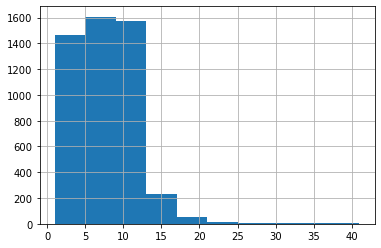

In [235]:
movies.cast_count.hist()

In [236]:
px.histogram(movies,'cast_count')